### Ogólne wprowadzenie

Algorytm pozwala na jednoczesne wyznaczenie najkrótszych ścieżek między każdą parą wierzchołków w grafie. W przypadku grafów o liczbie krawędzi $ O(V) $, nieposiadających krawędzi o ujemnych wagach, szybciej zadziała algorytm Dijkstry wywołany z każdego wierzchołka osobno. W przypadku, gdy w grafie są krawędzie o ujemnych wagach lub graf jest grafem gęstym, reprezentowanym macierzowo ($ E + O(V^2) $), wywoływanie algorytmu Bellmana-Forda nie jest dobrym pomysłem. Wtedy najlepszy jest poniższy algorytm.
<br><br>
Algorytm Floyda-Warshalla działa w sposób dynamiczny, tzn. odwołując się do wcześniejszego rozwiązania.
###### UWAGA
Mimo iż algorytm Floyda-Warshalla działa prawidłowo dla grafów z ujemnymi wagami krawędzi (a Dijkstry nie), to nie sprawdza on ujemnych cykli (jak ma to miejsce w algorytmie Bellmana-Forda). W przypadku, gdy takie cykle występują, algorytm znajdzie jakąś ścieżkę, ale nie uwzględni tego, że może ona przechodzić przez ujemny cykl, a tym samym jej sumaryczna waga powinna wynieść $ -\infty $, bo możemy przejść wiele razy przez ten cykl, osiągając najmniejszą możliwą sumaryczną wagę.
<br><br>
Możemy sobie jednak poradzić z tym problemem - omówienie rozwiązania znajduje się w podlinkowanym filmiku na YouTube (link znajduje się poniżej wideo ze studiów). Również w zamieszczonych w tym pliku implementacjach, sprawdzane jest istnienie cykli o ujemnych wagach.

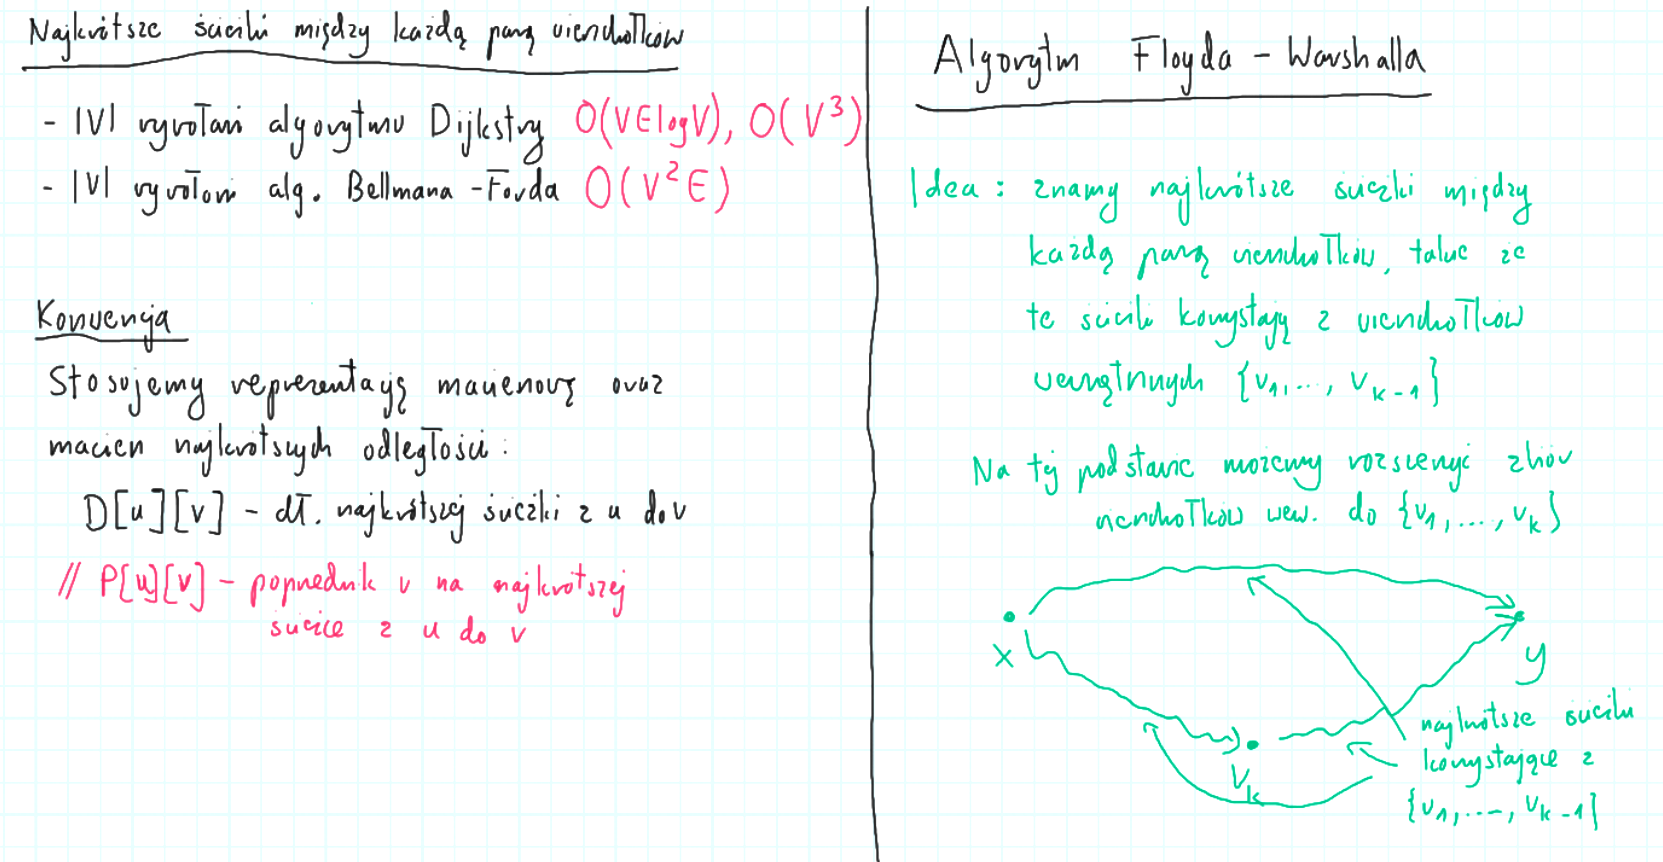

###### Dodatkowe materiały na YouTube:
LINK: https://www.youtube.com/watch?v=4NQ3HnhyNfQ

# (TYLKO) Dla macierzowej reprezentacji grafu
#### (Dla innej reprezentacji nie ma sensu ten algorytm, chyba, że byśmy utworzyli macierz sąsiedztwa)

### Złożoność

###### Obliczeniowa:
$ O(V^3) $  - gorsza niż w algorytmie Dijkstry, dlatego tego algorytmu używamy tylko dla grafów, w których mogą wystąpić ujemne wagi krawędzi
###### Pamięciowa:
$ O(V) $  - tylko tablica długości ścieżek

### Uwaga

W poniższych implementacjach algorytmu tworzę macierz pomocniczą, poprzez użycie funkcji $ deepcopy $ z biblioteki $ copy $. Zakładam, że w otrzymanej na wejściu macierzy, jeżeli nie istnieje krawędź pomiędzy parą wierzchołków, to wartość pola w macierzy sąsiedztwa dla danej pary wierzchołków $ u $, $ v $ wynosi $ G[u][v] = \infty $. Ponieważ i tak musimy utworzyć macierz z wartościami $ \infty $ oraz początkowymi wagami istniejących w grafie krawędzi, takie podejście jest szybsze i łatwiejsze. Jeżeli jednak nie moglibyśmy skorzystać biblioteki $ copy $ (a na kolokwiach i na egzaminie nie można), konieczne będzie i tak przejście przez całą macierz $ G $, reprezentującą graf i przepisanie wartości z tej macierzy do macierzy wag najkrótszych ścieżek (przykład niżej):

    inf = float('inf')
    W = [[inf] * n for _ in range(n)]
    
    for i in range(n):
        for j in range(n):
            W[i][j] = G[i][j]

lub jeżeli nieistniejące krawędzie są reprezentowane inaczej (np. przez $ -\infty $ lub $ None $):

    inf = float('inf')
    W = [[inf] * n for _ in range(n)]

    for i in range(n):
        for j in range(n):
            if <jest krawędź z 'i' do 'j'>:
                W[i][j] = G[i][j]
            elif i == j:
                W[i][j] = 0

### Implementacja #1 (Gorsza)
#### (Bez sprawdzania ujemnych cykli)
##### (Tylko wyznaczanie długości najkrótszej ścieżki)

In [1]:
import copy


def floyd_warshall(G: 'graph represented by adjacency matrix'):
    n = len(G)
    inf = float('inf')
    
    # Create a copy of a graph as we have to have lengths
    # of edges stored at the beginning of an algorithm
    W = copy.deepcopy(G)
    
    for t in range(n):
        for i in range(n):
            for j in range(n):
                if W[i][t] + W[t][j] < W[i][j]:
                    W[i][j] = W[i][t] + W[t][j]
                
    return W


def shortest_path(W: "array of path's weights", s: 'source', t: 'target'):
    return W[s][t]

###### Kilka testów

##### Pomocnicze:

In [2]:
def undirected_weighted_graph_matrix(E: 'array of edges'):
    # Find a number of vertices
    n = 0
    for e in E:
        n = max(n, e[0], e[1])
    n += 1
    # Create a graph
    G = [[float('inf')] * n for _ in range(n)]  # -1 means no edge
    for e in E:
        G[e[0]][e[1]] = e[2]
        G[e[1]][e[0]] = e[2]
    return G


def directed_weighted_graph_matrix(E: 'array of edges'):
    # Find a number of vertices
    n = 0
    for e in E:
        n = max(n, e[0], e[1])
    n += 1
    # Create a graph
    G = [[float('inf')] * n for _ in range(n)]  # -1 means no edge
    for e in E:
        G[e[0]][e[1]] = e[2]
    return G

##### Testy:

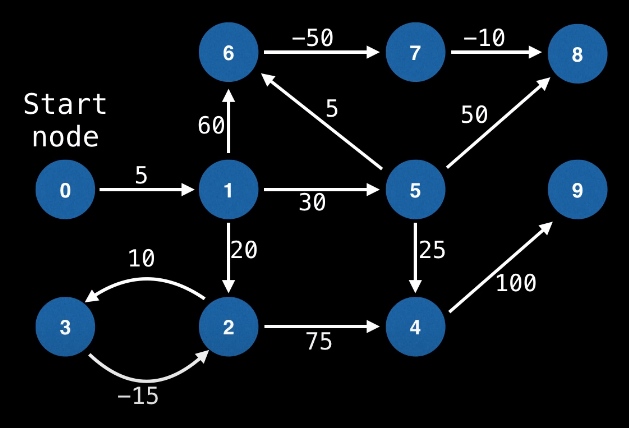

In [3]:
E = [(0, 1, 5), (1, 6, 60), (6, 7, -50), (7, 8, -10), (5, 6, 5), (1, 5, 30), (5, 8, 50), (1, 2, 20),
     (2, 3, 10), (3, 2, -15), (2, 4, 75), (4, 9, 100), (5, 4, 25)]
G = directed_weighted_graph_matrix(E)

W = floyd_warshall(G)
print(*W, sep='\n', end='\n\n')
print(shortest_path(W, 0, 8))
print(shortest_path(W, 0, 9))
print(shortest_path(W, 0, 3))

[inf, 5, 20, 30, 60, 35, 40, -10, -20, 160]
[inf, inf, 15, 25, 55, 30, 35, -15, -25, 155]
[inf, inf, -5, 5, 65, inf, inf, inf, inf, 165]
[inf, inf, -20, -10, 50, inf, inf, inf, inf, 150]
[inf, inf, inf, inf, inf, inf, inf, inf, inf, 100]
[inf, inf, inf, inf, 25, inf, 5, -45, -55, 125]
[inf, inf, inf, inf, inf, inf, inf, -50, -60, inf]
[inf, inf, inf, inf, inf, inf, inf, inf, -10, inf]
[inf, inf, inf, inf, inf, inf, inf, inf, inf, inf]
[inf, inf, inf, inf, inf, inf, inf, inf, inf, inf]

-20
160
30


### Implementacja #2 (Lepsza)
#### (Ze sprawdzaniem ujemnych cykli)
##### (Tylko wyznaczanie długości najkrótszej ścieżki)

In [4]:
import copy


def floyd_warshall(G: 'graph represented by adjacency matrix'):
    n = len(G)
    inf = float('inf')
    
    # Create a copy of a graph as we have to have lengths
    # of edges stored at the beginning of an algorithm
    W = copy.deepcopy(G)
    
    for t in range(n):
        for i in range(n):
            for j in range(n):
                if W[i][t] + W[t][j] < W[i][j]:
                    W[i][j] = W[i][t] + W[t][j]
                    
    # Detect negative cycles (the same approach as in the
    # Bellman-Ford's algoritm)
    for t in range(n):
        for i in range(n):
            for j in range(n):
                if W[i][t] + W[t][j] < W[i][j]:
                    W[i][j] = -inf
                
    return W


def shortest_path(W: "array of path's weights", s: 'source', t: 'target'):
    return W[s][t]

###### Kilka testów

##### Testy:

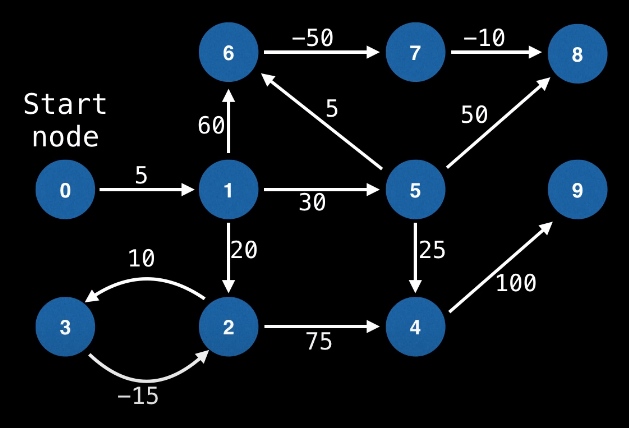

In [5]:
E = [(0, 1, 5), (1, 6, 60), (6, 7, -50), (7, 8, -10), (5, 6, 5), (1, 5, 30), (5, 8, 50), (1, 2, 20),
     (2, 3, 10), (3, 2, -15), (2, 4, 75), (4, 9, 100), (5, 4, 25)]
G = directed_weighted_graph_matrix(E)

W = floyd_warshall(G)
print(*W, sep='\n', end='\n\n')
print(shortest_path(W, 0, 8))
print(shortest_path(W, 0, 9))
print(shortest_path(W, 0, 3))

[inf, 5, -inf, -inf, -inf, 35, 40, -10, -20, -inf]
[inf, inf, -inf, -inf, -inf, 30, 35, -15, -25, -inf]
[inf, inf, -inf, -inf, -inf, inf, inf, inf, inf, -inf]
[inf, inf, -inf, -inf, -inf, inf, inf, inf, inf, -inf]
[inf, inf, inf, inf, inf, inf, inf, inf, inf, 100]
[inf, inf, inf, inf, 25, inf, 5, -45, -55, 125]
[inf, inf, inf, inf, inf, inf, inf, -50, -60, inf]
[inf, inf, inf, inf, inf, inf, inf, inf, -10, inf]
[inf, inf, inf, inf, inf, inf, inf, inf, inf, inf]
[inf, inf, inf, inf, inf, inf, inf, inf, inf, inf]

-20
-inf
-inf


### (Dodatkowo) Odtwarzanie najkrótszej ścieżki
#### (Ze sprawdzaniem ujemnych cykli)

In [6]:
import copy


def floyd_warshall(G: 'graph represented by adjacency matrix'):
    n = len(G)
    inf = float('inf')
    
    # Create a copy of a graph as we have to have lengths
    # of edges stored at the beginning of an algorithm
    W = copy.deepcopy(G)
    
    # B[i][j] - a vetrex on the shortest path from i to j
    # for which a path has the lowest total weight (length)
    B = [[None] * n for _ in range(n)]
    
    for t in range(n):
        for i in range(n):
            for j in range(n):
                if W[i][t] + W[t][j] < W[i][j]:
                    W[i][j] = W[i][t] + W[t][j]
                    B[i][j] = t
                    
    # Detect negative cycles (the same approach as in the
    # Bellman-Ford's algoritm)
    for t in range(n):
        for i in range(n):
            for j in range(n):
                if W[i][t] + W[t][j] < W[i][j]:
                    W[i][j] = -inf
                    B[i][j] = -1
                
    return W, B


def get_shortest_path(B: 'array of vertices between two vertices on a path', s: 'source', t: 'target'):
    # Check if there is a path
    if B[s][t] is None: return None
    # Check if we have a negative cycle (there is no shortest path)
    if B[s][t] < 0: return []
    
    path = []
    
    # Recursively restore a path
    def recur(i, j):
        if B[i][j] is None:
            return path.append(i)
        recur(i, B[i][j])
        recur(B[i][j], j)
    
    recur(s, t)
    path.append(t)
    
    return path

###### Kilka testów

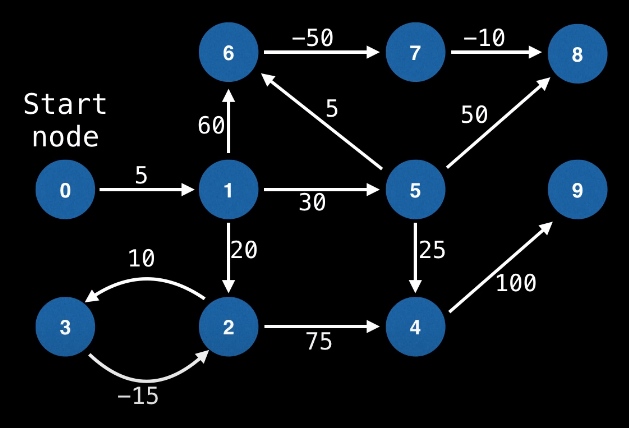

In [7]:
E = [(0, 1, 5), (1, 6, 60), (6, 7, -50), (7, 8, -10), (5, 6, 5), (1, 5, 30), (5, 8, 50), (1, 2, 20),
     (2, 3, 10), (3, 2, -15), (2, 4, 75), (4, 9, 100), (5, 4, 25)]
G = directed_weighted_graph_matrix(E)

W, B = floyd_warshall(G)
print(*W, sep='\n', end='\n\n')
print(get_shortest_path(B, 0, 8))
print(get_shortest_path(B, 0, 9))
print(get_shortest_path(B, 0, 3))
print(get_shortest_path(B, 1, 7))

[inf, 5, -inf, -inf, -inf, 35, 40, -10, -20, -inf]
[inf, inf, -inf, -inf, -inf, 30, 35, -15, -25, -inf]
[inf, inf, -inf, -inf, -inf, inf, inf, inf, inf, -inf]
[inf, inf, -inf, -inf, -inf, inf, inf, inf, inf, -inf]
[inf, inf, inf, inf, inf, inf, inf, inf, inf, 100]
[inf, inf, inf, inf, 25, inf, 5, -45, -55, 125]
[inf, inf, inf, inf, inf, inf, inf, -50, -60, inf]
[inf, inf, inf, inf, inf, inf, inf, inf, -10, inf]
[inf, inf, inf, inf, inf, inf, inf, inf, inf, inf]
[inf, inf, inf, inf, inf, inf, inf, inf, inf, inf]

[0, 1, 5, 6, 7, 8]
[]
[]
[1, 5, 6, 7]
